In [2]:
import pandas as pd

In [2]:
df_test = pd.read_csv('/Users/hankiho/Desktop/Data/타이타닉_데이터/test.csv')

In [3]:
df_test.shape

(418, 11)

In [4]:
df_train = pd.read_csv('/Users/hankiho/Desktop/Data/타이타닉_데이터/train.csv')

In [5]:
df_train.shape

(891, 12)

In [6]:
# train 셋과 test셋 차이점이 Survived행이라 삭제
df_train = df_train.drop("Survived", 1)

In [7]:
df_train.shape

(891, 11)

In [8]:
df = pd.concat([df_train, df_test], axis = 0)

In [9]:
df.shape

(1309, 11)

In [10]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
for i in df.columns:
    print(i + " : " + str(len(df[i].value_counts())))  

PassengerId : 1309
Pclass : 3
Name : 1307
Sex : 2
Age : 98
SibSp : 7
Parch : 8
Ticket : 929
Fare : 281
Cabin : 186
Embarked : 3


In [12]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [14]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [15]:
df['Initial'] = 0
for i in df:
    df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

In [16]:
pd.crosstab(df.Initial,df.Sex).T

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [17]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age'] = 33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age'] = 36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age'] = 5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age'] = 22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age'] = 46

In [19]:
df['Sex'].isnull().sum()

0

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

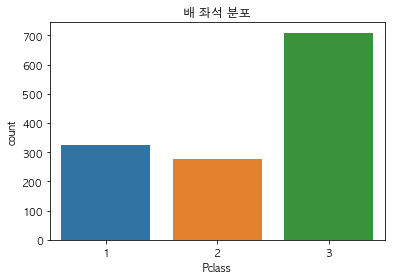

In [21]:
sns.countplot(x = 'Pclass',data = df)
plt.title("배 좌석 분포")
plt.show()

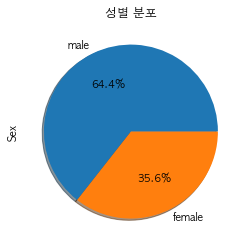

In [22]:
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title("성별 분포")
plt.show()

/Users/hankiho/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


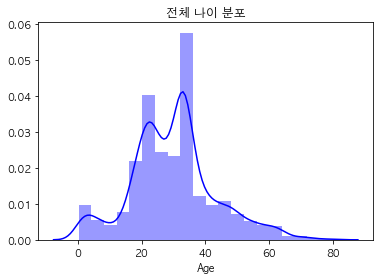

In [23]:
sns.distplot(df["Age"], bins = 20, color="b")
plt.title("전체 나이 분포")
plt.xlabel("Age")
plt.show()

In [24]:
df['Ages'] = ''

for i in range(len(df)):
    if df['Age'].values[i] < 7:
        df['Ages'].values[i] = '유아'
    elif df['Age'].values[i] >= 7 and df['Age'].values[i] < 20:
        df['Ages'].values[i] = '10대'
    elif df['Age'].values[i] >= 20 and df['Age'].values[i] < 30:
        df['Ages'].values[i] = '20대'
    elif df['Age'].values[i] >= 30 and df['Age'].values[i] < 40:
        df['Ages'].values[i] = '30대'
    elif df['Age'].values[i] >= 40 and df['Age'].values[i] < 50:
        df['Ages'].values[i] = '40대'
    elif df['Age'].values[i] >= 50 and df['Age'].values[i] < 60:
        df['Ages'].values[i] = '50대'
    elif df['Age'].values[i] >= 60 and df['Age'].values[i] < 70:
        df['Ages'].values[i] = '60대'
    else:
        df['Ages'].values[i] = '70대이상'

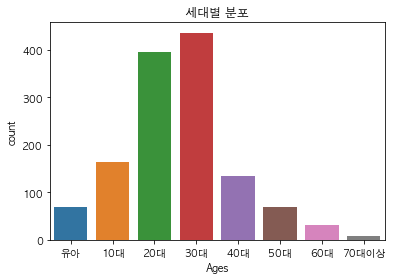

In [25]:
sns.countplot(x = 'Ages',
              order = ['유아','10대','20대','30대','40대','50대','60대','70대이상'],
              #order = df['Ages'].value_counts().index,
              data = df)
plt.title("세대별 분포")
plt.show()

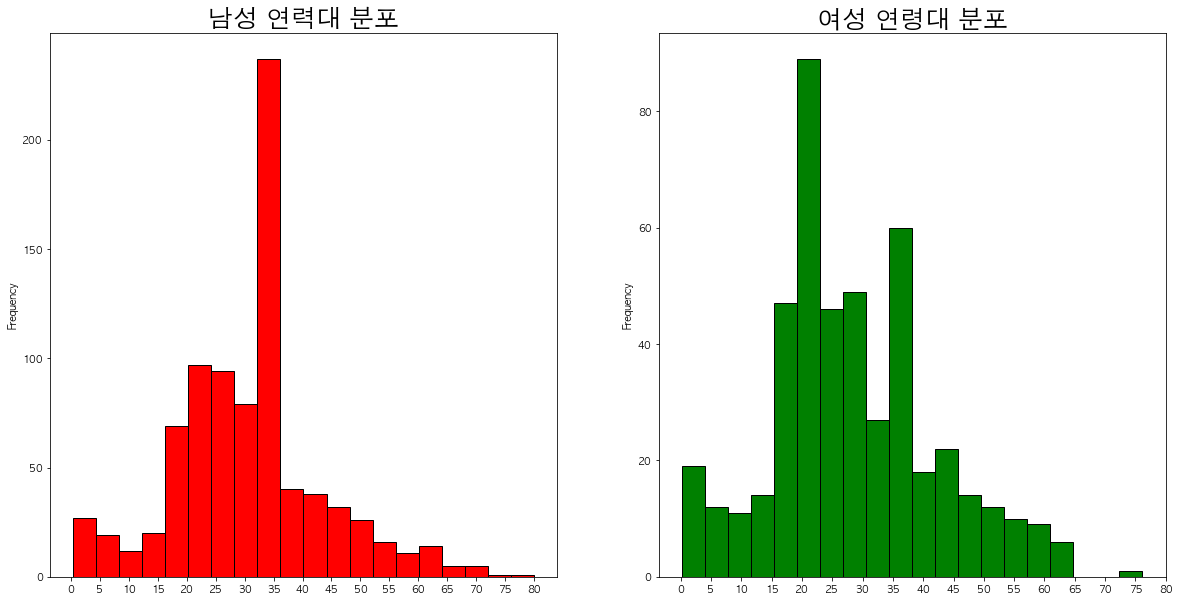

In [26]:
f,ax = plt.subplots(1,2,figsize = (20,10))
df[df['Sex'] == 'male'].Age.plot.hist(ax = ax[0],bins = 20,edgecolor = 'black',color = 'red')
ax[0].set_title('남성 연력대 분포', fontsize = 25)
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Sex'] == 'female'].Age.plot.hist(ax = ax[1],color='green',bins = 20,edgecolor = 'black')
ax[1].set_title('여성 연령대 분포', fontsize = 25)
x2= list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
--------------------------


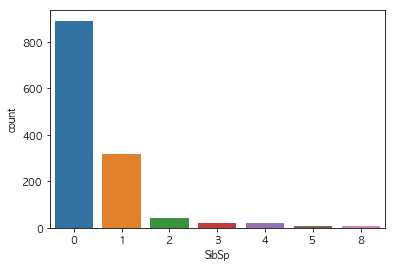

In [27]:
print (df['SibSp'].value_counts())
print ('--------------------------')
sns.countplot('SibSp', data = df)

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64
--------------------------


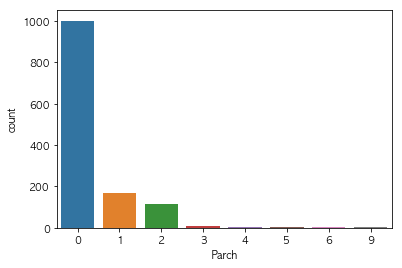

In [28]:
print (df['Parch'].value_counts())
print ('--------------------------')
sns.countplot('Parch', data = df)

In [29]:
#박스플롯이 안그려짐 변수 간격이 큰가 봄
df['Fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

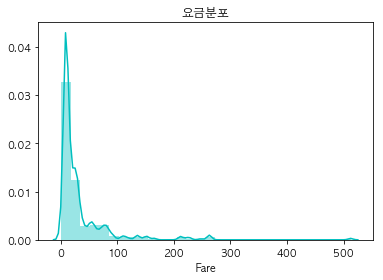

In [30]:
sns.distplot(df["Fare"], bins = 30, color = 'c')
plt.title("요금분포")
plt.xlabel("Fare")
plt.show()

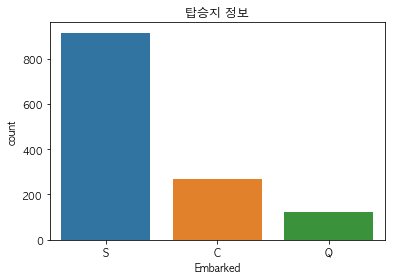

In [31]:
#C : Cherbourg, Q : Queenstown, S : Southampton
sns.countplot(x = 'Embarked',data = df)
plt.title("탑승지 정보")
plt.show()

Pclass    1    2    3
Sex                  
female  144  106  216
male    179  171  493
--------------------------


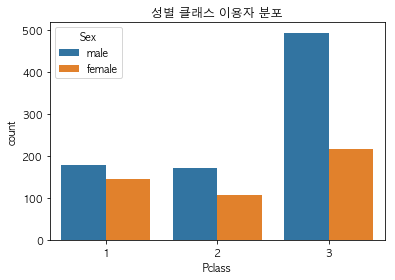

In [32]:
print (pd.crosstab(df['Sex'], df['Pclass']))
print ('--------------------------')

sns.countplot(x = 'Pclass', hue = 'Sex',data = df)
plt.title("성별 클래스 이용자 분포")
plt.show()

In [33]:
pd.crosstab([df.SibSp],df.Sex)

Sex,female,male
SibSp,,
0,262,629
1,160,159
2,19,23
3,12,8
4,7,15
5,2,4
8,4,5


In [34]:
pd.crosstab([df.Parch],df.Sex)

Sex,female,male
Parch,,
0,293,709
1,88,82
2,69,44
3,6,2
4,4,2
5,4,2
6,1,1
9,1,1


Sex
female    46.198097
male      26.140721
Name: Fare, dtype: float64
--------------------------------
Pclass
1    87.508992
2    21.179196
3    13.304513
Name: Fare, dtype: float64


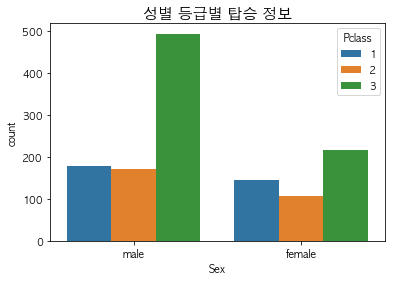

In [35]:
print (df.groupby('Sex')['Fare'].mean())
print ('--------------------------------')
print (df.groupby('Pclass')['Fare'].mean())

sns.countplot(x = "Sex", data = df, hue = "Pclass")
plt.title('성별 등급별 탑승 정보', fontsize = 15)
plt.show()

In [38]:
# 3등급이 분포가 가장 많은데 총 수익도 가장 많을까?
#df.groupby('Pclass')['Fare'].sum().plot.bar()
print ('--------------------------------')
print (df.groupby('Pclass')['Fare'].sum())
print ('--------------------------------')
# 남자가 많이 탔는데 총 수익도 가장 많을까?
print (df.groupby('Sex')['Fare'].sum())
print ('--------------------------------')
# 20~30대가 가장 많은 티켓 수익을 주었을까?
print (df.groupby('Ages')['Fare'].sum())
print ('--------------------------------')

--------------------------------
Pclass
1    28265.4043
2     5866.6374
3     9432.8994
Name: Fare, dtype: float64
--------------------------------
Sex
female    21528.3130
male      22036.6281
Name: Fare, dtype: float64
--------------------------------
Ages
10대       5058.9168
20대      10143.8540
30대      13653.4702
40대       5723.5168
50대       4384.9541
60대       2237.6584
70대이상      290.0334
유아        2072.5374
Name: Fare, dtype: float64
--------------------------------


결론: 20~30대 싱글대상한테 인기가 많은 여행상품이였다.

In [39]:
df['Sex_binominal'] = int(0)

for i in range(len(df)):
    if df['Sex'].values[i] == 'female':
        df['Sex_binominal'].values[i] = 0
    elif df['Sex'].values[i] == 'male':
        df['Sex_binominal'].values[i] = 1

In [40]:
df['Sex_binominal'].value_counts()

0    843
1    466
Name: Sex_binominal, dtype: int64

In [41]:
df_dicisiontree = df[['Pclass','Age','Fare','Sex_binominal']]

In [42]:
df_dicisiontree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 4 columns):
Pclass           1309 non-null int64
Age              1309 non-null float64
Fare             1309 non-null float64
Sex_binominal    1309 non-null int64
dtypes: float64(2), int64(2)
memory usage: 91.1 KB


In [43]:
from sklearn.model_selection import train_test_split
#X변수는 독립변수 Y변수는 종속변수
X_train, X_test, y_train, y_test = train_test_split(df_dicisiontree[['Pclass','Age','Fare']], #독립 변수 데이터
                                                    df_dicisiontree[['Sex_binominal']], #종속변수 데이터
                                                    test_size = 0.1, #나누는 사이즈 비율
                                                    random_state = 7) #난수 시드

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 13)
tree_clf.fit(X_train, y_train)
print('Score: {}'.format(tree_clf.score(X_train, y_train)*100))

Score: 70.62818336162988


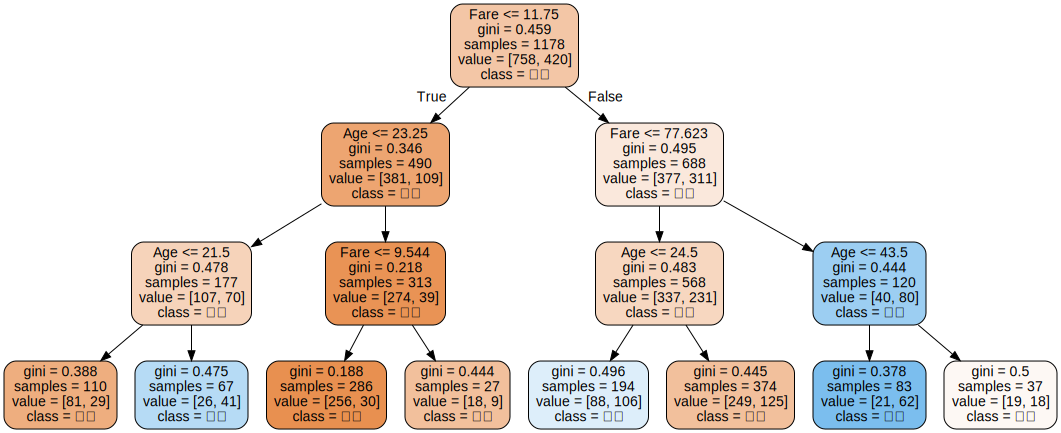

In [45]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file = "titanic.dot",
        feature_names = ['Pclass','Age','Fare'],
        class_names = ['남자','여자'],
        rounded = True,
        filled = True,
        #speical_characters = True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup = True)
dot

In [46]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  67.17557251908397


머신러닝

In [14]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score

In [3]:
df_train = pd.read_csv('/Users/hankiho/Desktop/Data/타이타닉_데이터/train.csv')

In [5]:
#나이 결측치 처리
df_train['Initial'] = 0

for i in df_train:
    df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [6]:
df_train.Age.isnull().sum()

0

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Initial        891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [9]:
df_train_1 = df_train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
df_train_1['Sex_binominal'] = int(0)

for i in range(len(df_train_1)):
    if df_train_1['Sex'].values[i] == 'female':
        df_train_1['Sex_binominal'].values[i] = 0
    elif df_train_1['Sex'].values[i] == 'male':
        df_train_1['Sex_binominal'].values[i] = 1

/Users/hankiho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
df_train_1['With'] = df_train_1['SibSp'] + df_train_1['Parch']

/Users/hankiho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_train_2 = df_train_1[['Survived','Pclass','Sex_binominal','Age','With','Fare']]
X_train, X_test, y_train, y_test = train_test_split(df_train_2[['Pclass','Age','Fare','With','Sex_binominal']], #독립 변수 데이터
                                                    df_train_2[['Survived']], #종속변수 데이터
                                                    test_size = 0.3, #나누는 사이즈 비율
                                                    random_state = 7) #난수 시드
X = df_train_2[df_train_2.columns[1:]]
Y = df_train_2['Survived']

In [15]:
#Decision Tree
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 13)
tree_clf.fit(X_train, y_train)
print('Score: {}'.format(tree_clf.score(X_train, y_train)*100))
print ('----------------------------')
y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Score: 87.1589085072231
----------------------------
Test Accuracy is  77.61194029850746


In [57]:
#Radial Support Vector Machines(rbf-SVM)
rbf_SVM = svm.SVC(kernel = 'rbf',C = 7,gamma = 0.1)
rbf_SVM.fit(X_train, y_train)
print('Score: {}'.format(rbf_SVM.score(X_train, y_train)*100))
print ('----------------------------')
y_pred = rbf_SVM.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Score: 94.22150882825039
----------------------------
Test Accuracy is  67.16417910447761


/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
#LogisticRegression
Logistic = LogisticRegression(C = 0.1)
Logistic.fit(X_train, y_train)
print('Score: {}'.format(Logistic.score(X_train, y_train)*100))
print ('----------------------------')
y_pred = Logistic.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Score: 81.54093097913324
----------------------------
Test Accuracy is  76.86567164179104


/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
#KNN
KNN = KNeighborsClassifier() 
KNN.fit(X_train, y_train)
print('Score: {}'.format(KNN.score(X_train, y_train)*100))
print ('----------------------------')
y_pred = KNN.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Score: 81.54093097913324
----------------------------
Test Accuracy is  64.55223880597015


/Users/hankiho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/hankiho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/hankiho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/hankiho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/hankiho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/hankiho/anaconda3/lib/python3.6/site-packages

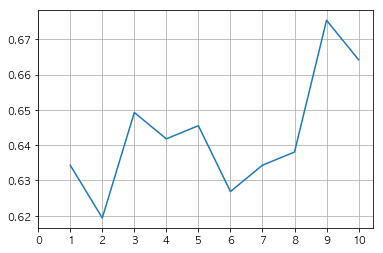

Accuracies for different values of n are: [0.63432836 0.61940299 0.64925373 0.64179104 0.64552239 0.62686567
 0.63432836 0.6380597  0.67537313 0.6641791 ] with the max value as  0.6753731343283582


In [60]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    KNN = KNeighborsClassifier(n_neighbors=i) 
    KNN.fit(X_train, y_train)
    prediction = KNN.predict(X_test)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
plt.grid()
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [61]:
#Gussian Naive Bayes
G_NB = GaussianNB()
G_NB.fit(X_train, y_train)
print('Score: {}'.format(G_NB.score(X_train, y_train)*100))
print ('----------------------------')
y_pred = G_NB.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Score: 81.38041733547352
----------------------------
Test Accuracy is  77.23880597014924


/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
#Random Forest
RF = RandomForestClassifier(n_estimators = 100,random_state = 13)
RF.fit(X_train, y_train)
print('Score: {}'.format(RF.score(X_train, y_train)*100))
print ('----------------------------')
y_pred = RF.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Score: 98.87640449438202
----------------------------
Test Accuracy is  77.61194029850746


/Users/hankiho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Cross Validation

In [63]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits = 5, random_state = 13) 
xyz = []
accuracy = []
std = []
classifiers = ['Radial Svm','Logistic Regression','KNN',
               'Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel = 'rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors = 9),
          DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators = 100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       

/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packa

                      CV Mean       Std
Radial Svm           0.699266  0.038225
Logistic Regression  0.794608  0.025557
KNN                  0.684715  0.050323
Decision Tree        0.774415  0.017850
Naive Bayes          0.793522  0.019201
Random Forest        0.811500  0.029440
------------------------


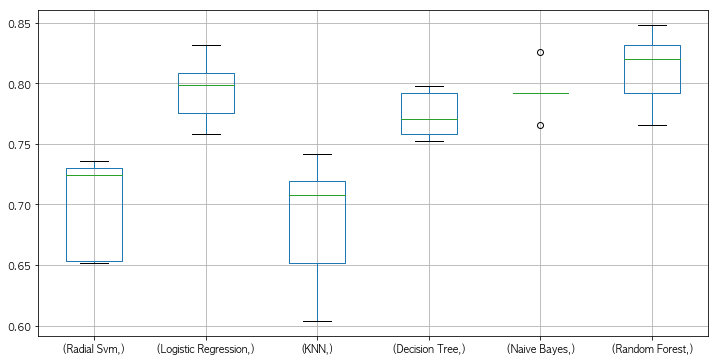

In [64]:
print (new_models_dataframe2)
print ('------------------------')
plt.subplots(figsize = (12,6))
box = pd.DataFrame(accuracy,index = [classifiers])
box.T.boxplot()

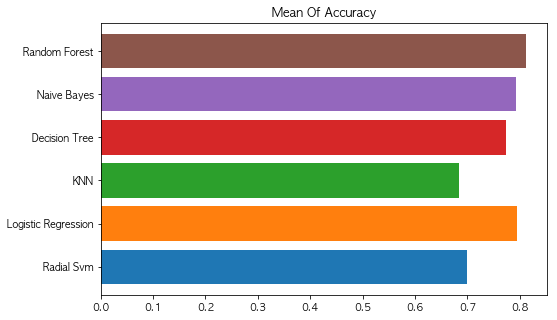

In [65]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Mean Of Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

앙상블 - 보팅

In [66]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors = 9)),
                                              ('RBF',svm.SVC(probability = True,
                                                             kernel = 'rbf',C = 7,gamma = 0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators = 100,
                                                                             random_state = 13)),
                                              ('LR',LogisticRegression(C = 0.1)),
                                              ('DT',DecisionTreeClassifier(max_depth = 5, 
                                                                           random_state = 13)),
                                              ('NB',GaussianNB())]
                                    ,voting = 'soft').fit(X_train, y_train)
#soft는 가장큰 확률 값을 따르게한다. hard는 다수결의 원칙으로 진행된다.
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_train, y_train)*100)
cross = cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean()*100)

/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy for ensembled model is: 91.65329052969501


/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

The cross validated score is 81.83109181704687


/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


앙상블 - 배깅

In [67]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 9),
                          random_state = 13,n_estimators = 100)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
result = cross_val_score(model,X,Y,cv = 10,scoring = 'accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

/Users/hankiho/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for bagged KNN is: 0.6753731343283582
The cross validated score for bagged KNN is: 0.7150749063670412


부스팅

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 500,random_state = 13,learning_rate = 0.1)
result = cross_val_score(ada,X,Y,cv = 10,scoring = 'accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.814952332311883


그라디언트 부스팅

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8215815457950291


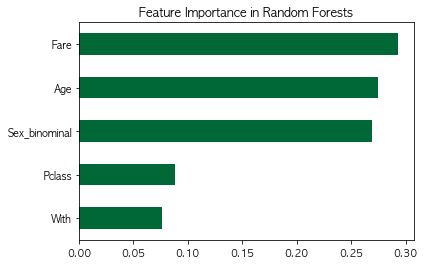

In [70]:
model = RandomForestClassifier(n_estimators = 500,random_state = 0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.5,cmap='RdYlGn_r')
plt.title('Feature Importance in Random Forests')

plt.show()

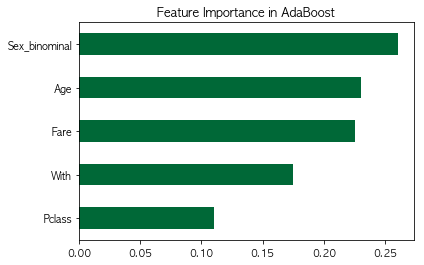

In [71]:
model = AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.5,cmap='RdYlGn_r')
plt.title('Feature Importance in AdaBoost')

plt.show()